In [330]:
import pandas as pd
import numpy as np
import pandas_profiling



In [358]:
data.head()
#released this won't work well
data = pd.read_csv("../../data/raw/data.csv")

data = data.drop(["blueFirstBlood"], axis = 1)


In [362]:
#New idea, resturcter data in terms of winning teams

#blue time
blueTeamWon = data[data['blueWins'] == 1]
blueTeamWon = blueTeamWon.drop(blueTeamWon.iloc[:, 22:], axis = 1)
blueTeamWon = blueTeamWon.rename(columns={"blueWardsPlaced":"wardsPlaced","redWardsDestroyed":"wardsDestroyed","blueWardsDestroyed":"wardsLost","blueKills":"kills", "blueDeaths":"deaths","blueKDA":"KDA", "blueDragons":"dragonsTaken",
                                        "blueAssits":"assits","blueEliteMonsters":"eliteMonsters", "blueHeralds":"heraldsTaken","blueTower":"towersTaken","blueTotalGold":"totalGold","blueAvgLevel":"avgLevel","blueTotalMinionsKilled":"totalMinionsKilled",
                                       "blueGoldDiff":"goldDiff","blueCSPerMin":"csPerMin","redTowersDestoryed":"losingTeamTowersDestoried","blueTowersDestoried":'towerDestoried',
                                          "blueAssits":"assists","blueExperienceDiff":"experienceDiff","redWardsPlaced":"losingTeamWardsPlaced","redGoldPerMin":"losingTeamGoldPerMin","blueTowersDestroyed":"towersLost"
                                         ,"blueTotalExperience":"totalExperience","bluefirstBlood":"firstBlood","redFirstBlood":"losingTeamFirstBlood","blueAssists":"assists","redAssists":"losingTeamAssits","blueGoldPerMin":"goldPerMin","blueWardsDestroyed":"wardsLost"
                                         , "blueTotalJungleMinionsKilled":"totalJungleMinionsKilled", "redTotalJungleMinionsKilled":"losingTeamTotalJungleMinionsKilled"})

#blueTeamWon = blueTeamWon.drop("blueTowersTaken", axis = 1)
#redtime
redTeamWon = data[data['blueWins'] == 0]
redTeamWon = redTeamWon.drop(redTeamWon.iloc[:, 2:23], axis = 1)
#readTeamWon = readTeamWon.drop(columns)
redTeamWon = redTeamWon.rename(columns={"redWardsPlaced":"wardsPlaced","blueWardsDestroyed":"wardsDestroyed","redKills":"kills", "redDeaths":"deaths", "redDragons":"dragonsTaken",
                                        "redAssits":"assists","redEliteMonsters":"eliteMonsters", "redHeralds":"heraldsTaken","redTower":"towersTaken","redTotalGold":"totalGold","redAvgLevel":"avgLevel","redTotalMinionsKilled":"totalMinionsKilled",
                                       "redGoldDiff":"goldDiff","redCSPerMin":"csPerMin","redGoldPerMin":"goldPerMin","blueTowersDestoried":'losingTeamTowersDestoried',"redTowersDestoryed":'towersLost',"redExperienceDiff":"experienceDiff", 
                                       "blueWardsPlaced":"losingTeamWardsPlaced","blueGoldPerMin":"losingTeamGoldPerMin","redTowersTaken":"losingTeanTowersTaken","redTotalExperience":"totalExperience",
                                       "redAssists":"assists","blueAssists":"losingTeamAssits","redWardsDestroyed":"wardsLost","redTowersDestroyed":"towersLost","redTotalJungleMinionsKilled":"totalJungleMinionsKilled", "blueTotalJungleMinionsKilled":"losingTeamTotalJungleMinionsKilled"})
#redTeamWon = redTeamWon.drop("redTowersDestroyed", axis = 1)


In [363]:
frames = [blueTeamWon,redTeamWon]
data1 = pd.concat(frames)
data1['teamWon'] = ['blue' if  x == 1 else 'red' for x in data1['blueWins']]
data1.to_csv('hii.csv')

In [283]:
#wrapping
def load_and_process(data):
    df = pd.read_csv(data)
    df1 = (
        df.query('blueWins == 1').assign(
            KDA = lambda x: x['blueKills'] + x['blueAssists']/x['blueDeaths']),
            firstBlood = lambda x: 'yes' if  y == 1 else 'no' for y in x['blueFirstBlood']
        
    )
    return df1

SyntaxError: invalid syntax (<ipython-input-283-e4391447a150>, line 7)

In [184]:
test = '../../data/raw/data.csv'
load_and_process(test)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,KDA
5,4475365709,1,18,0,0,5,3,6,1,1,...,15201,7.0,18060,221,59,-698,-101,22.1,1520.1,7.000000
6,4493010632,1,18,3,1,7,6,7,1,1,...,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3,8.166667
9,4509433346,1,13,1,1,4,5,5,1,1,...,16605,6.8,18379,247,43,1548,1574,24.7,1660.5,5.000000
12,4515594785,1,18,1,1,7,1,11,1,1,...,14591,6.8,17443,240,50,-3274,-1659,24.0,1459.1,18.000000
14,4516505202,1,15,3,1,4,4,4,0,0,...,16192,7.0,18083,242,48,470,187,24.2,1619.2,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9872,4527650398,1,12,0,1,7,7,9,0,0,...,16399,7.0,18001,216,58,-756,-1,21.6,1639.9,8.285714
9873,4527878058,1,18,2,1,12,6,13,0,0,...,15934,6.6,17027,197,38,-2639,-2364,19.7,1593.4,14.166667
9874,4527873286,1,17,2,1,7,4,5,1,1,...,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6,8.250000
9875,4527797466,1,54,0,0,6,4,8,1,1,...,15456,7.0,18367,206,56,-782,-888,20.6,1545.6,8.000000


In [65]:
wardData = data[['teamWon', 'blueWardsPlaced', 'redWardsPlaced']]
killsData = data[]
groupWardData = wardData.groupby('teamWon').agg({'blueWardsPlaced':['mean']})
groupWardData.head()

,blueWardsPlaced
,mean
teamWon,
blue,22.289858
red,22.286725


<AxesSubplot:xlabel='teamWon'>

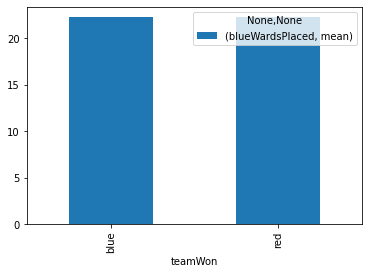

In [72]:
groupWardData.plot.bar()